In [1]:
# Jupyter Notebook to test useful_functions.py
import numpy as np
import pandas as pd
import re
import sps_alps as alp
from matplotlib import pyplot as plt
import pickle
from useful_functions import *

# Load configuration
from md_config import *

print(f"Configuration loaded: {OPTICS} optics, p={MOMENTUM_GEV} GeV/c, CTIME={t1_ms}-{t2_ms} ms")


>>> Loading nx2pd.py version of 06.03.2024 @ 09:01AM

Configuration loaded: Q26 optics, p=26.0 GeV/c, CTIME=6000-12000 ms


In [ ]:
# This is very long, so we do not run it by default
if not USE_PICKLE:
    df_all = get_data(START_TIME, END_TIME, CYCLE_NAME)
    if not isinstance(df_all.index, pd.DatetimeIndex):
        df_all.index = pd.to_datetime(df_all.index)
    BPM_df, ctime = alp.process_nxcals(df_all)
    #save to pickle for faster loading next time
    df_all.to_pickle(DATA_FILE)
else:
    # We retrieve it from a local file instead
    df_all = pd.read_pickle(DATA_FILE)
    BPM_df, ctime = alp.process_nxcals(df_all)

/home/sterbini/2025_05_22_nxcals_test/miniconda/nxcals-bundle/conf/spark-env.sh: line 104: /bin/python: No such file or directory


ENVIRONMENT:
NXCALS_VERSION=1.6.11
VIRTUAL_ENV=
SPARK_HOME=/home/sterbini/2025_05_22_nxcals_test/miniconda/nxcals-bundle
SPARK_CONF_DIR=/tmp/nxcals-37f361ffc216d231dbd02d7ce20b1d57/conf
SPARK_DEFAULTS=/home/sterbini/2025_05_22_nxcals_test/miniconda/nxcals-bundle/conf/spark-defaults.conf
NXCALS_WORKSPACE_TEMP_DIR=/tmp/nxcals-37f361ffc216d231dbd02d7ce20b1d57
PACKED_VENV_FILE=/tmp/nxcals-37f361ffc216d231dbd02d7ce20b1d57/nxcals-python3-env.tar.gz
PYSPARK_PYTHON=/home/sterbini/2025_05_22_nxcals_test/miniconda/bin/python
PYSPARK_DRIVER_PYTHON=/bin/python
PYSPARK_DRIVER_PYTHON_OPTS=
LOCK=/tmp/nxcals-37f361ffc216d231dbd02d7ce20b1d57/.lock

IMPORTANT:
Rebuilding of the packed venv is required in cases there are new or modified packages provided by a user. In order to recreate the packed venv please:
        - remove the file (rm /tmp/nxcals-37f361ffc216d231dbd02d7ce20b1d57/nxcals-python3-env.tar.gz)
        - execute your script again (rebuild will be performed during the startup of PySpark/Pyt

25/11/10 15:24:16 WARN Utils: Service 'sparkDriver' could not bind on port 5001. Attempting port 5002.
25/11/10 15:24:16 WARN Utils: Service 'sparkDriver' could not bind on port 5002. Attempting port 5003.
25/11/10 15:24:16 WARN Utils: Service 'sparkDriver' could not bind on port 5003. Attempting port 5004.
25/11/10 15:24:16 WARN Utils: Service 'sparkDriver' could not bind on port 5004. Attempting port 5005.
25/11/10 15:24:16 WARN Utils: Service 'sparkDriver' could not bind on port 5005. Attempting port 5006.
25/11/10 15:24:16 WARN Utils: Service 'SparkUI' could not bind on port 5201. Attempting port 5202.
25/11/10 15:24:16 WARN Utils: Service 'SparkUI' could not bind on port 5202. Attempting port 5203.
25/11/10 15:24:16 WARN Utils: Service 'SparkUI' could not bind on port 5203. Attempting port 5204.
25/11/10 15:24:16 WARN Utils: Service 'SparkUI' could not bind on port 5204. Attempting port 5205.
25/11/10 15:24:16 WARN Utils: Service 'SparkUI' could not bind on port 5205. Attempting p

Data from 2025-05-28 10:55:50 to 2025-05-28 11:24:55 for cycle MD_CRAB_26_270_L8823_Q26_2025_V1 acquired.


/home/sterbini/2025_05_22_nxcals_test/miniconda/lib/python3.9/site-packages/pandas/core/series.py:4135: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mapped = lib.map_infer(values, f, convert=convert_dtype)


Processing cycle: 2025-05-28 08:56:12.135000+00:00
Channel: BPV.10108.V, nn: 0
Channel: BPH.10208.H, nn: 1
Channel: BPV.10308.V, nn: 2
Channel: BPH.10408.H, nn: 3
Channel: BPV.10508.V, nn: 4
Channel: BPH.10608.H, nn: 5
Channel: BPV.10708.V, nn: 6
Channel: BPH.10808.H, nn: 7
Channel: BPV.10908.V, nn: 8
Channel: BPV.11108.V, nn: 9
Channel: BPV.11308.V, nn: 10
Channel: BPV.11508.V, nn: 11
Channel: BPH.11008.H, nn: 12
Channel: BPH.11208.H, nn: 13
Channel: BPH.11408.H, nn: 14
Channel: BPH.11608.H, nn: 15
Channel: BPV.11706.V, nn: 16
Channel: BPH.11831.H, nn: 17
Channel: SPARE, nn: 18
Channel: BPCE.11906.V, nn: 19
Channel: BPH.12008.H, nn: 20
Channel: BPV.12108.V, nn: 21
Channel: BPH.12208.H, nn: 22
Channel: SPARE, nn: 23
Channel: BPCN.12308.V, nn: 24
Channel: BPH.12408.H, nn: 25
Channel: SPARE, nn: 26
Channel: BPCN.12508.V, nn: 27
Channel: BPH.12608.H, nn: 28
Channel: BPV.12708.V, nn: 29
Channel: BPH.12808.H, nn: 30
Channel: BPV.12908.V, nn: 31
Channel: BPH.13008.H, nn: 32
Channel: BPV.1310

In [3]:
# Load optics and time windows from config
props_indexed = load_props_indexed(optics_file)
masters_H, masters_V = {}, {}

# Loop over time windows defined in config
for label, tstart, tend in windows:
    # slice by time window
    BPM_df_w = BPM_df.loc[tstart:tend]
    if BPM_df_w.empty:
        print(f"[{label}] empty after slicing BPM_df.loc[...]")
        masters_H[label] = None
        masters_V[label] = None
        continue
    # split by plane
    BPH_df_w = BPM_df_w.filter(like='BPH', axis=1)
    BPV_df_w = BPM_df_w.filter(like='BPV', axis=1)
    # align properties table to the plane DataFrame through props for plane function
    props_H_w = props_for_plane(BPH_df_w, props_indexed) if not BPH_df_w.empty else None
    props_V_w = props_for_plane(BPV_df_w, props_indexed) if not BPV_df_w.empty else None
    # after alignement, create the master table for each plane (the one containing everything)
    mH = master_for_plane(BPH_df_w, props_H_w, "H", ctime, t1_ms, t2_ms) if props_H_w is not None else None
    mV = master_for_plane(BPV_df_w, props_V_w, "V", ctime, t1_ms, t2_ms) if props_V_w is not None else None
    # sort by phase for nicer plotting
    if mH is not None and not mH.empty:
        mH = mH.dropna().sort_values("mux").reset_index(drop=True)
    if mV is not None and not mV.empty:
        mV = mV.dropna().sort_values("muy").reset_index(drop=True)
    masters_H[label] = mH
    masters_V[label] = mV
    print(f"[{label}] H shape:{None if mH is None else mH.shape}  V shape:{None if mV is None else mV.shape}")

[m180] H shape:(100, 14)  V shape:(91, 14)
[m150] H shape:(100, 14)  V shape:(91, 14)
[m120] H shape:(100, 14)  V shape:(91, 14)
[m90] H shape:(100, 14)  V shape:(91, 14)
[m60] H shape:(100, 14)  V shape:(91, 14)
[m30] H shape:(100, 14)  V shape:(91, 14)
[p0] H shape:(100, 14)  V shape:(91, 14)
[p30] H shape:(100, 14)  V shape:(91, 14)
[p60] H shape:(100, 14)  V shape:(91, 14)
[p90] H shape:(100, 14)  V shape:(91, 14)
[p120] H shape:(100, 14)  V shape:(91, 14)


In [4]:
def build_response_matrix(beta_bpm, mu_bpm_turns, beta_kick, mu_kick_turns, Q):
    # μ are in TURNS → convert to phase [rad]
    psi_bpm  = 2*np.pi*mu_bpm_turns
    psi_kick = 2*np.pi*mu_kick_turns
    denom = 2*np.sin(np.pi*Q)
    return np.sqrt(beta_bpm * beta_kick) / denom * np.cos(psi_bpm - psi_kick - np.pi*Q)

def solve_crab_kick_from_masters(masters_plane, ref_label, cc_optics, Q, p_GeV, plane="H"):
    ref_df = masters_plane.get(ref_label)
    if ref_df is None or ref_df.empty:
        raise ValueError(f"Reference window {ref_label} missing or empty")

    key_to_ref = ref_df.set_index("key")["orbit_win_mm"]
    results = []
    
    # Select columns based on plane
    beta_col = "betx" if plane == "H" else "bety"
    mu_col = "mux" if plane == "H" else "muy"

    for label, df in masters_plane.items():
        if label == ref_label or df is None or df.empty:
            continue

        dfw = df.set_index("key")
        common = key_to_ref.index.intersection(dfw.index)
        if len(common) < 5:
            print(f"[{label}] not enough common BPMs"); continue

        # Build clean table and drop NaNs
        T = pd.DataFrame({
            "dx_m": (dfw.loc[common, "orbit_win_mm"] - key_to_ref.loc[common]) * 1e-3,  # meters
            "beta": dfw.loc[common, beta_col],
            "mu":   dfw.loc[common, mu_col],
        }).dropna()
        if len(T) < 5:
            print(f"[{label}] not enough clean BPMs after dropna"); continue

        y = T["dx_m"].to_numpy()
        beta_bpm = T["beta"].to_numpy()
        mu_bpm   = T["mu"].to_numpy()

        # Design matrix (meters per rad)
        R_cols = [build_response_matrix(beta_bpm, mu_bpm, cc["beta"], cc["mu"], Q) for cc in cc_optics]
        R = np.column_stack(R_cols)

        # Fit in meters
        theta, *_ = np.linalg.lstsq(R, y, rcond=None)
        volts = theta * p_GeV * 1e3     # theta [rad] × p[GeV] × 1000 → MV

        results.append({
            "window": label,
            **{f"theta_{cc['label']}": theta[i]*1e6 for i, cc in enumerate(cc_optics)},  # µrad
            **{f"V_{cc['label']}": volts[i] for i, cc in enumerate(cc_optics)},          # MV
            "residual_rms_mm": 1e3*np.sqrt(np.mean((R @ theta - y)**2)),
        })

    return pd.DataFrame(results)

# Use config parameters
kicks_df = solve_crab_kick_from_masters(
    masters_H, 
    ref_label=REFERENCE_LABEL, 
    cc_optics=cc_optics_H, 
    Q=Qx, 
    p_GeV=MOMENTUM_GEV,
    plane="H"
)

# Show results
print(kicks_df)

  window  theta_CC1     V_CC1  residual_rms_mm
0   m150  -0.297183 -0.007727         0.066475
1   m120   0.798566  0.020763         0.117439
2    m90   3.119047  0.081095         0.419502
3    m60   6.152358  0.159961         0.779564
4    m30   8.375341  0.217759         1.103512
5     p0  10.216956  0.265641         1.322267
6    p30   9.932063  0.258234         1.360978
7    p60   8.601186  0.223631         1.186797
8    p90   6.599163  0.171578         0.887827
9   p120   4.101142  0.106630         0.534551


A = 0.138 MV,  phi0 = 71.5°,  c = 0.128 MV


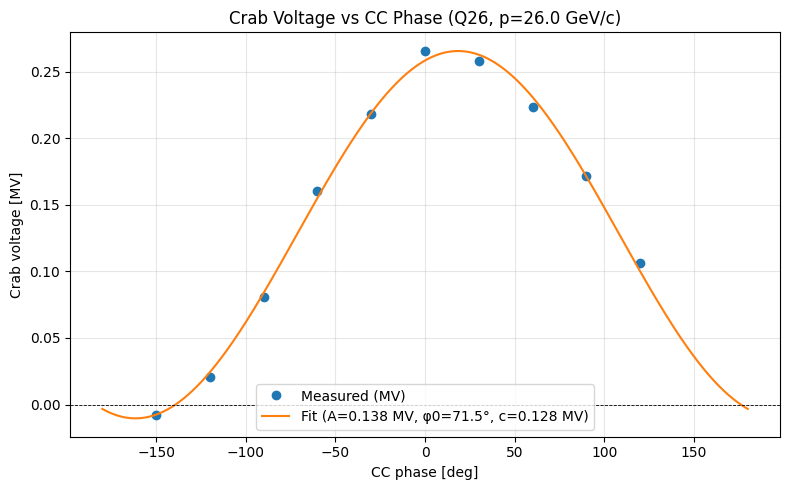

In [5]:
import numpy as np

def fit_sine_with_offset(phi_deg, V_MV, force_c=None):
    """
    Fit V(phi) = A * sin(phi + phi0) + c   with phi in *degrees* and V in MV.
    Returns dict with A_MV, phi0_deg, c_MV, and a callable V_fit(phi_deg).

    Args
    ----
    phi_deg : 1D array-like (degrees)
    V_MV    : 1D array-like (MV)
    force_c : float or None
        If not None, fixes c to this value (e.g. 0.0) and fits only A, phi0.

    Notes
    -----
    We fit the linear form: V = a*sin(phi) + b*cos(phi) + c
    then convert:
        A   = sqrt(a^2 + b^2)
        phi0 = atan2(b, a)   (in radians), then to degrees
        c   = c
    """
    phi = np.deg2rad(np.asarray(phi_deg, dtype=float))
    y   = np.asarray(V_MV, dtype=float)

    s, cphi = np.sin(phi), np.cos(phi)

    if force_c is None:
        # design matrix: [sin(phi), cos(phi), 1]
        A = np.column_stack([s, cphi, np.ones_like(phi)])
        a, b, c0 = np.linalg.lstsq(A, y, rcond=None)[0]
        c_fit = float(c0)
    else:
        # remove fixed offset and fit only sin/cos
        y2 = y - float(force_c)
        A = np.column_stack([s, cphi])
        a, b = np.linalg.lstsq(A, y2, rcond=None)[0]
        c_fit = float(force_c)

    A_amp   = float(np.hypot(a, b))         # amplitude in MV
    phi0    = float(np.degrees(np.arctan2(b, a)))  # deg, in (-180, 180]

    # normalize: keep A >= 0, fold phase accordingly
    if A_amp < 0:
        A_amp  = -A_amp
        phi0  += 180.0
    # wrap phase to (-180, 180]
    phi0 = (phi0 + 180.0) % 360.0 - 180.0

    def V_fit(query_phi_deg):
        q = np.deg2rad(np.asarray(query_phi_deg))
        return A_amp * np.sin(q + np.deg2rad(phi0)) + c_fit

    return {
        "A_MV": A_amp,
        "phi0_deg": phi0,
        "c_MV": c_fit,
        "V_fit": V_fit,
    }

# Use phase_deg from config
df = kicks_df[kicks_df["window"].isin(phase_deg)].copy()
phi_deg_array = df["window"].map(phase_deg).to_numpy()
V_MV    = df["V_CC1"].to_numpy()

fit = fit_sine_with_offset(phi_deg_array, V_MV)        # or fit_sine_with_offset(phi_deg, V_MV, force_c=0.0)

print(f"A = {fit['A_MV']:.3f} MV,  phi0 = {fit['phi0_deg']:.1f}°,  c = {fit['c_MV']:.3f} MV")

# Plot
import matplotlib.pyplot as plt
phi_plot = np.linspace(-180, 180, 721)
plt.figure(figsize=(8,5))
plt.plot(phi_deg_array, V_MV, "o", label="Measured (MV)")
plt.plot(phi_plot, fit["V_fit"](phi_plot), "-", label=f"Fit (A={fit['A_MV']:.3f} MV, φ0={fit['phi0_deg']:.1f}°, c={fit['c_MV']:.3f} MV)")
plt.axhline(0, color="k", lw=0.6, ls="--")
plt.xlabel("CC phase [deg]"); plt.ylabel("Crab voltage [MV]")
plt.title(f"Crab Voltage vs CC Phase ({OPTICS}, p={MOMENTUM_GEV} GeV/c)")
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()